In [544]:
CLIENT_ID=*SEE NOTES*
CLIENT_SECRET=*SEE NOTES*

In [550]:
import spotipy
from spotipy import util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import urllib

In [423]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

In [341]:
blockbuster = 'spotify:track:5jQYkYhoOlBW4vJ2l4TCxl'

In [574]:
def show_album_art(uri):
    # Getting track object
    track = sp.track(uri)
    
    # Extracting image URL 
    url = track['album']['images'][0]['url']
    
    # Creating file object
    f = urllib.request.urlopen(url)
    
    # Creating an matplotlib image read object specifying jpg format
    a = plt.imread(f, format='jpg')
    
    # Turning off axis
    plt.axis(False)
    
    # Showing image
    plt.imshow(a);

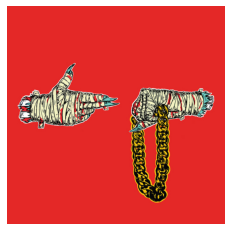

In [566]:
show_album_art(blockbuster)

In [624]:
def spotify_uri_search(search, type='album', limit=10):
    '''
    Search for a Spotify track or album URI. 
    '''
    # Creating empty results list and results dictionary
    results = []
    res_dict = {}

     # Replacing spaces with + 
    q = search.replace(' ', '+')

    # Creating search object
    res = sp.search(q=q, type=type)

    # Selecting all of the tracks in search object
    tracks = res[type+'s']['items']
    
    # Iterating through tracks or albums 
    for item in tracks:
        # Creating result dictionary entry
        res_dict[item['name']] = item['uri']
        
        # Adding name of track or album along with the artists to results
        results.append(item['name'] + ' by ' + item['artists'][0]['name'])
    
    # Printing results for user to decide which album
    for i in range(len(results)):
        print(f'{i}: {results[i]}')
        
    # Requesting user input for correct choice
    response = input('Please select a valid index')
    
    # Selecting appropriate Spotify URI
    uri = res_dict.get(results[int(response)].split(' by ')[0])
    
    return uri

In [ ]:
spotify_uri_search('rage', 'album')

0: Rage Against The Machine - XX (20th Anniversary Special Edition) by Rage Against The Machine
1: Rage by Gressartikas
2: Rage Against The Machine by Rage Against The Machine
3: Rage Valley by Knife Party
4: Luv Is Rage 2 by Lil Uzi Vert
5: Rage and Tragedy by Lost Dog Street Band
6: Evil Empire by Rage Against The Machine
7: The Battle Of Los Angeles by Rage Against The Machine
8: Rage of Angels by Santino Le Saint
9: Rage by 637godwin


In [615]:
res_dict

{'Bigger Love': 'spotify:album:7BRuKFs9BFuba9TlMs2ZLd',
 'Big, Big Plans': 'spotify:album:7xVbpLEzt8IQn82IBSMPzu',
 'Bigger Than Both Of Us': 'spotify:album:5TNzBp7QYsXIHrI5xxVuic',
 'Big Willie Style': 'spotify:album:2esWeP8Ln1sXA0jbDmi3Zq',
 'Detroit 2': 'spotify:album:6slkiHeFK3wW2D1mao0TX3',
 'Bigger, Better, Faster, More !': 'spotify:album:2P8M5eo4zWFD0JJtH4D0iA',
 'Big Plans': 'spotify:album:55qkK5QfwfwUOMjye419s3',
 'Big Fish Theory': 'spotify:album:5h3WJG0aZjNOrayFu3MhCS',
 'BIG 4x': 'spotify:album:1ZnnZq7opRLmwMh8POrG72',
 'Big Baby DRAM': 'spotify:album:7CHEC1kVstFUDPTxB3Hz2V'}

In [610]:
res = sp.search(q=q, type='album')
res['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5y2Xq6xcjJb2jVM54GHK3t'},
   'href': 'https://api.spotify.com/v1/artists/5y2Xq6xcjJb2jVM54GHK3t',
   'id': '5y2Xq6xcjJb2jVM54GHK3t',
   'name': 'John Legend',
   'type': 'artist',
   'uri': 'spotify:artist:5y2Xq6xcjJb2jVM54GHK3t'}],
 'available_markets': ['AD',
  'AE',
  'AL',
  'AR',
  'AT',
  'AU',
  'BA',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'BY',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HR',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'KZ',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MD',
  'ME',
  'MK',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'RS',
  'RU',
  'SA',
  'SE',
  'SG',
  'SI',
  'SK'

In [590]:
res_dict

{'Hood Rich': 'spotify:track:5H3c7nLyycQOkvZjtojFr3',
 'Tha Block Is Hot': 'spotify:track:6JeGO13ate4ycPgegtCtpr'}

In [372]:
def choose_uri(results, res_dict):
    print(results)
    idx = input('Select index of song above.')
    choice = results[int(idx)].split(' by ')[0]
    return res_dict.get(choice)

In [373]:
uri = choose_uri(results, res_dict)

['Blockbuster Night, Pt. 1 by Run The Jewels', 'Blockbuster Night, Pt. 2 - Bonus Track by Run The Jewels', 'Blockbuster Night Pt. 1 - Live From SXSW / 2015 by Run The Jewels', 'Blockbuster Night, Pt. 1 by Run The Jewels', 'Quantum of Solace: Night at the Opera (arr. N. Raine for orchestra) by David Arnold', 'Quantum of Solace: A Night at the Opera by Royal Philharmonic Orchestra', 'Blockbuster Night, Pt. 1 by Run The Jewels', 'Rock All Night by The Blockbusters', 'Blockbuster Night by Luu Breeze', 'Blockbuster Nights by Leonard Dstroy']


Select index of song above. 0


In [507]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
import pandas as pd
pd.set_option("display.precision", 14)

In [519]:
def recommend_songs(artists=None, genres=None, tracks=None, limit=100, n_tracks=10):
    uri = tracks[0]
    track_audio = sp.audio_features(uri)
    track = sp.track(uri)
    df = pd.DataFrame.from_dict(track_audio)
    df['track_name'] = track['name']
    df['popularity'] = track['popularity']
    
    res = sp.recommendations(seed_artists=artists, seed_genres=genres, seed_tracks=tracks, limit=limit)
    
    names = []
    uris = []
    for track in res['tracks']:
        names.append(track['name'])
        uris.append(track['uri'])
    
    features = sp.audio_features(uris)
    for i in range(len(features)):
        features[i]['track_name'] = names[i]
        features[i]['popularity'] = sp.track(uris[i])['popularity']
    features_df = pd.DataFrame.from_dict(features)
    
    df = pd.concat([df, features_df])
    df.reset_index(inplace=True, drop=True)
    
    numeric_features = df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'track_name'], axis=1)
    
    sims = cosine_similarity(X=numeric_features, Y=numeric_features[:1])
    df['similarities'] = sims
    sorted_df = df.sort_values('similarities', ascending=False)
    
    sorted_df = sorted_df[:n_tracks+1]
    for uri in sorted_df['uri']:
        print(uri)
    for name in sorted_df['track_name']:
        print(name)
    
    
    return sorted_df

In [521]:
df = recommend_songs(tracks=['spotify:track:5jQYkYhoOlBW4vJ2l4TCxl'], genres=['dub-step'])

spotify:track:5jQYkYhoOlBW4vJ2l4TCxl
spotify:track:5POEFQCKtD0QxYLfZ2kqEx
spotify:track:7iEoaTyBCqLaAwJnOP1BTn
spotify:track:7wMCECqH5hlj6HF2J2LKAZ
spotify:track:4XkXgUNDVBMj3oJoE8yspZ
spotify:track:5jJ69cMDMC0aeWPjZo6VP2
spotify:track:1EjzcBTVLV7ATtdsQwyV31
spotify:track:0SADXPubFbFXu7ZR3M86io
spotify:track:62l1ZGNoUlJlVwhwMKu2T6
spotify:track:2uxudaBcJamtfgvUjSDdkZ
spotify:track:6R0GRYk2vs2XuBVemYK5YZ
Blockbuster Night, Pt. 1
BagBak
The Games We Play
Doorman
Numbers On The Boards
Lampshades on Fire
yankee and the brave (ep. 4)
What's Golden
Simon Says
out of sight (feat. 2 Chainz)
Ultimate


In [523]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'track_name', 'popularity', 'similarities'],
      dtype='object')

In [422]:
numeric_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,0.701,0.525,1,-7.938,0,0.3820,0.03530,0.000003,0.0615,0.385,75.693,152253,4,59
1,0.431,0.898,1,-4.233,0,0.1660,0.01100,0.001150,0.5230,0.192,81.637,528880,4,46
2,0.358,0.889,1,-8.045,1,0.3350,0.26600,0.000015,0.1720,0.666,85.610,130480,4,64
3,0.681,0.880,9,-3.895,1,0.2270,0.05670,0.000000,0.0893,0.380,124.885,275520,4,57
4,0.618,0.636,1,-3.558,1,0.3690,0.17800,0.000000,0.0887,0.179,84.692,290987,4,23
5,0.642,0.901,1,-3.688,0,0.0773,0.01680,0.000002,0.0887,0.352,100.039,202145,4,48
6,0.711,0.905,6,-7.459,1,0.2180,0.12200,0.000166,0.3950,0.437,98.931,288347,4,55
7,0.460,0.697,6,-5.954,0,0.3250,0.01860,0.000000,0.3620,0.701,153.426,202120,4,60
8,0.297,0.508,2,-6.471,1,0.0793,0.00204,0.002910,0.4190,0.105,168.310,162453,4,33
9,0.677,0.599,10,-10.917,0,0.3200,0.03910,0.000000,0.4510,0.631,134.220,203471,4,44


In [499]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
import pandas as pd
pd.set_option("display.precision", 14)


In [351]:
numeric = features_df.drop(['track_name', 'uri'], axis=1)

In [352]:
numeric

,popularity,danceability,valence,tempo,time_signature,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness
0,66,0.826,0.653,99.130,4,0.566,10,-10.747,0,0.3100,0.19700,0.000000,0.3560
1,60,0.526,0.283,81.305,4,0.936,8,-4.576,1,0.2630,0.31600,0.000384,0.2610
2,57,0.483,0.204,114.382,4,0.841,5,-5.115,0,0.0964,0.01080,0.000003,0.3820
3,61,0.678,0.498,80.318,4,0.662,1,-6.473,1,0.3000,0.01230,0.000000,0.1330
4,48,0.650,0.829,88.306,4,0.806,10,-4.293,0,0.2550,0.10100,0.000000,0.2810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,0.547,0.608,146.750,3,0.884,8,-1.452,1,0.3660,0.02210,0.000001,0.0662
96,37,0.744,0.224,96.997,4,0.836,4,-6.308,0,0.0467,0.44200,0.002940,0.0978
97,48,0.331,0.177,83.687,4,0.659,7,-10.640,1,0.0795,0.00352,0.000027,0.0820
98,42,0.609,0.230,88.149,4,0.712,0,-6.478,1,0.2520,0.00501,0.143000,0.6290


In [430]:
len(numeric_features[:1])

1

In [494]:
sims = cosine_similarity(X=numeric_features, Y=numeric_features[:1])

In [495]:
df['similarities'] = sims

In [506]:
sorted_df = df.sort_values('similarities', ascending=False)
for uri in sorted_df['uri']:
    print(uri)

spotify:track:5jQYkYhoOlBW4vJ2l4TCxl
spotify:track:2NmNknhvFBq8DKGsj1DE7I
spotify:track:1Y2ExJJ9Dmb9po8K0ybSj3
spotify:track:7y8X0Z04gJCKtfrnSAMywJ
spotify:track:6q4P5GViMZJfgpfNVr5txY
spotify:track:0E2UdlzNQP9I70MYumYlFo
spotify:track:2HRYa6iG1M5DRefO8pK2I3
spotify:track:6bGwKHXHNLmTy6yt147FPh
spotify:track:5NZk1lwVltQgTjAUMeyPji
spotify:track:2zWZV7b1xu1qZPaMjavvpS
spotify:track:1kTef9tFF9gRK4xd66swrG


In [333]:
user='elw86ve5g5t944wwlef6qyzu3'

In [568]:
token = util.prompt_for_user_token(username=user, 
                                   scope='playlist-modify-private,playlist-modify-public', 
                                   client_id=CLIENT_ID, 
                                   client_secret=CLIENT_SECRET, 
                                   redirect_uri='https://localhost:8080' )

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [569]:
token

'BQCbAY0LZJvC8LvThNffojbFPa9wZ6RMigLWlZwByUfHfsWne3lSzUuPCxYg5j6wVOrVUki-jq_WIauZDoMssqRxVZzBRFsXZ9qhpoHkbvLm_7dxHPfZX1uIcmu_iZzwyITxUzki6drDnJIdnBTBeRPUpmDupdO_1NC1SmZYwtvlYFimGHejBUFJHKWqXQohsKy42UC018nHLK6xaZJbM18-oorfsQ2gikQ'

In [567]:
sp.user_playlist_create(user='elw86ve5g5t944wwlef6qyzu3', name='Test', public=True, description='Testing')

HTTP Error for POST to https://api.spotify.com/v1/users/elw86ve5g5t944wwlef6qyzu3/playlists returned 403 due to This request requires user authentication.


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/users/elw86ve5g5t944wwlef6qyzu3/playlists:
 This request requires user authentication., reason: None

In [584]:
recommend_songs(tracks=[blockbuster], n_tracks=100)

spotify:track:5jQYkYhoOlBW4vJ2l4TCxl
spotify:track:5POEFQCKtD0QxYLfZ2kqEx
spotify:track:5jJ69cMDMC0aeWPjZo6VP2
spotify:track:1EjzcBTVLV7ATtdsQwyV31
spotify:track:24vNw0Z0srb4zYXwrakw8E
spotify:track:2uxudaBcJamtfgvUjSDdkZ
spotify:track:6LyzqxbVyIUoDtr4dYshIl
spotify:track:1TNLYKpEPZ0g6jQq34pDcU
spotify:track:2fClGossFdEdhjjeYceaN7
spotify:track:3SlMNSBqe7y3kzrOTI72WI
spotify:track:4AHZRMJCpscmxygCNtC2Qq
spotify:track:2rk0lCpO1vkKAQ6BC8bjUX
spotify:track:0PDGCtMLGQ6zbKMMuqltuY
spotify:track:2Pp3QD3thPnk2kCxmu2MHK
spotify:track:5YpZh8wfS4moRBk0ijNcXr
spotify:track:6JKoTnberZoBgUuxa6l4Kh
spotify:track:1LM6EReMkAxuDXDF26ekl2
spotify:track:0RdiYSv0mUfqYXN5WwYXjl
spotify:track:6npcJbgDhtWeNT5iOGsjZI
spotify:track:6w6SW8zyEcyxwSR7Wya45a
spotify:track:0301nLjG0ti26rx5ZmfqtP
spotify:track:6plT7nFGiXKSBP9HFSI4ef
spotify:track:3gRlmtdCyNoKiyozn2pqc9
spotify:track:7uL9Q8h4hzzCuGTZ3Yttmv
spotify:track:6EC5JMW0hwIRawSOVJfVQn
spotify:track:50jXnyrzW4mcBBqFTMEoAC
spotify:track:48ZUwXrEOhaXLCxvmRYhZv
s

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,popularity,similarities
0,0.701,0.525,1,-7.938,0,0.3820,0.03530,0.00000255,0.0615,0.385,...,audio_features,5jQYkYhoOlBW4vJ2l4TCxl,spotify:track:5jQYkYhoOlBW4vJ2l4TCxl,https://api.spotify.com/v1/tracks/5jQYkYhoOlBW...,https://api.spotify.com/v1/audio-analysis/5jQY...,152253,4,"Blockbuster Night, Pt. 1",59,1.00000000000000
9,0.760,0.828,1,-4.532,1,0.0789,0.04780,0.00042700,0.0893,0.923,...,audio_features,5POEFQCKtD0QxYLfZ2kqEx,spotify:track:5POEFQCKtD0QxYLfZ2kqEx,https://api.spotify.com/v1/tracks/5POEFQCKtD0Q...,https://api.spotify.com/v1/audio-analysis/5POE...,160507,4,BagBak,56,0.99999999884483
78,0.659,0.906,7,-3.906,0,0.0428,0.15600,0.00000327,0.1050,0.792,...,audio_features,5jJ69cMDMC0aeWPjZo6VP2,spotify:track:5jJ69cMDMC0aeWPjZo6VP2,https://api.spotify.com/v1/tracks/5jJ69cMDMC0a...,https://api.spotify.com/v1/audio-analysis/5jJ6...,187720,4,Lampshades on Fire,59,0.99999999629938
3,0.595,0.878,10,-5.630,0,0.4230,0.17200,0.00000000,0.3030,0.746,...,audio_features,1EjzcBTVLV7ATtdsQwyV31,spotify:track:1EjzcBTVLV7ATtdsQwyV31,https://api.spotify.com/v1/tracks/1EjzcBTVLV7A...,https://api.spotify.com/v1/audio-analysis/1Ejz...,146573,4,yankee and the brave (ep. 4),60,0.99999999581409
51,0.826,0.566,10,-10.747,0,0.3100,0.19700,0.00000000,0.3560,0.653,...,audio_features,24vNw0Z0srb4zYXwrakw8E,spotify:track:24vNw0Z0srb4zYXwrakw8E,https://api.spotify.com/v1/tracks/24vNw0Z0srb4...,https://api.spotify.com/v1/audio-analysis/24vN...,216133,4,Wu-Tang Clan Ain't Nuthing ta F' Wit,66,0.99999999506150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.297,0.508,2,-6.471,1,0.0793,0.00204,0.00291000,0.4190,0.105,...,audio_features,1kTef9tFF9gRK4xd66swrG,spotify:track:1kTef9tFF9gRK4xd66swrG,https://api.spotify.com/v1/tracks/1kTef9tFF9gR...,https://api.spotify.com/v1/audio-analysis/1kTe...,162453,4,Ryderz,33,0.99999983767311
35,0.638,0.741,1,-6.012,0,0.2920,0.03430,0.00000000,0.0761,0.702,...,audio_features,7w9lcJGLImMytniCQkJqJC,spotify:track:7w9lcJGLImMytniCQkJqJC,https://api.spotify.com/v1/tracks/7w9lcJGLImMy...,https://api.spotify.com/v1/audio-analysis/7w9l...,166907,4,Kirby,48,0.99999983240610
72,0.525,0.746,7,-5.810,1,0.2190,0.17500,0.00000000,0.3230,0.755,...,audio_features,01zffoSenvp9JnSbl0UgMa,spotify:track:01zffoSenvp9JnSbl0UgMa,https://api.spotify.com/v1/tracks/01zffoSenvp9...,https://api.spotify.com/v1/audio-analysis/01zf...,154483,4,Put Jewels on It,32,0.99999978676568
84,0.615,0.648,11,-6.604,0,0.3520,0.02680,0.00000000,0.5150,0.479,...,audio_features,1UsHdJAj4Y1sMIqAh1mS02,spotify:track:1UsHdJAj4Y1sMIqAh1mS02,https://api.spotify.com/v1/tracks/1UsHdJAj4Y1s...,https://api.spotify.com/v1/audio-analysis/1UsH...,132050,3,Story 2,45,0.99999971164857
